   age  sex  chest_pain_type  rest_bp  chol  fbs  restecg  max_hr  \
0   52    1                0      125   212    0        1     168   
1   53    1                0      140   203    1        0     155   
2   70    1                0      145   174    0        1     125   
3   61    1                0      148   203    0        1     161   
4   62    0                0      138   294    1        1     106   

   exercise_ang  oldpeak  slope  ca  thal  target  
0             0      1.0      2   2     3       0  
1             1      3.1      0   0     3       0  
2             1      2.6      0   0     3       0  
3             0      0.0      2   1     3       0  
4             0      1.9      1   3     2       0  
age                  int64
sex                  int64
chest_pain_type      int64
rest_bp              int64
chol                 int64
fbs                  int64
restecg              int64
max_hr               int64
exercise_ang         int64
oldpeak            float64
slo

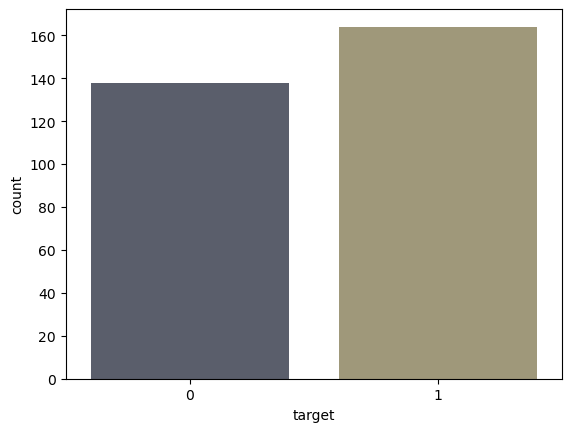

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and display the dataset
df = pd.read_csv(r"C:\Users\enapi\Captsone 2\Lib\heart_disease_clean.csv")
print(df.head())
print(df.dtypes)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Combine the encoded features with the target variable
df_encoded = pd.concat([X_encoded, y], axis=1)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

# Combine the encoded features with the target variable
df_encoded = pd.concat([X_encoded, y.reset_index(drop=True)], axis=1)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_encoded)
X_scaled_minmax_df = pd.DataFrame(X_scaled_minmax, columns=X_encoded.columns)
df_scaled_minmax = pd.concat([X_scaled_minmax_df, y.reset_index(drop=True)], axis=1)

# Standardization
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X_encoded)
X_scaled_standard_df = pd.DataFrame(X_scaled_standard, columns=X_encoded.columns)
df_scaled_standard = pd.concat([X_scaled_standard_df, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the scaled datasets
print("Min-Max Scaled Data:")
print(df_scaled_minmax.head())
print("\nStandardized Data:")
print(df_scaled_standard.head())


#balancing?
xx = df['target'].value_counts().reset_index()
sns.barplot(x="target", y="count", data=xx, hue="target", palette='cividis', legend=False)
total_count = xx['count'].sum()
proportion_0 = xx[xx['target'] == 0]['count'].values[0] / total_count
proportion_1 = xx[xx['target'] == 1]['count'].values[0] / total_count
print(f"Proportion of 0: {proportion_0:.2f}")
print(f"Proportion of 1: {proportion_1:.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))